In [1]:
import os
from os import listdir
from os.path import isfile, join
import sys
from xml.etree import ElementTree
from xml.etree.ElementTree import Element, SubElement
from lxml import etree
import codecs
import cv2
XML_EXT = '.xml'
ENCODE_METHOD = "UTF8"
from google.colab import drive
from torch.utils.data import DataLoader
import torch
from torch.utils.data import Dataset
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms


In [25]:
#Mounting to the google drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
class PascalVocReader:

    def __init__(self, file_path):
        # shapes type:
        # [labbel, [(x1,y1), (x2,y2), (x3,y3), (x4,y4)], color, color, difficult]
        self.shapes = []
        self.file_path = file_path
        self.verified = False
        try:
            self.parse_xml()
        except:
            pass

    def get_shapes(self):
        return self.shapes

    def add_shape(self, label, bnd_box, difficult):
        x_min = int(float(bnd_box.find('xmin').text))
        y_min = int(float(bnd_box.find('ymin').text))
        x_max = int(float(bnd_box.find('xmax').text))
        y_max = int(float(bnd_box.find('ymax').text))
        points = [(x_min, y_min), (x_max, y_min), (x_max, y_max), (x_min, y_max)]
        self.shapes.append((label, points, None, None, difficult))

    def parse_xml(self):
        assert self.file_path.endswith(XML_EXT), "Unsupported file format"
        parser = etree.XMLParser(encoding=ENCODE_METHOD)
        xml_tree = ElementTree.parse(self.file_path, parser=parser).getroot()
        filename = xml_tree.find('filename').text
        try:
            verified = xml_tree.attrib['verified']
            if verified == 'yes':
                self.verified = True
        except KeyError:
            self.verified = False

        for object_iter in xml_tree.findall('object'):
            bnd_box = object_iter.find("bndbox")
            label = object_iter.find('name').text
            # Add chris
            difficult = False
            if object_iter.find('difficult') is not None:
                difficult = bool(int(object_iter.find('difficult').text))
            self.add_shape(label, bnd_box, difficult)
        return True
# font = cv2.FONT_HERSHEY_SIMPLEX
# color=(0,0,255)
# annotations=r"/content/drive/My Drive/400/Annotation/HCM/train"     #Annotations folder
# images=r"/content/drive/My Drive/400/HCM/train"     #Images folder
# results=r"/content/drive/My Drive/results"     #Folder where you want to store results

# files=[f for f in listdir(annotations)if isfile(join(annotations,f))]

# for f in files:
#     xml_path=join(annotations,f)
#     thickness=0
#     resolution=f.split('_')[-1].split('.')[0]
#     if resolution=="1000x":
#         thickness=33
#     elif resolution=="400x":
#         thickness=14
#     else:
#         thickness=3
# #     print(f)
#     img_name=f.split('x')[0]+'x.png'
#     img_path=join(images,img_name)
# #     print(img_path)
#     # print(xml_path)
#     img=cv2.imread(img_path)
#     t_voc_parse_reader = PascalVocReader(xml_path)
#     shapes = t_voc_parse_reader.get_shapes()
#     # print(len(shapes))
#     for s in shapes:
#         org=s[1][0]
#         org=(org[0], org[1]-8)
#         color=(0,0,255)
#         if s[0]=="ring":
#             color=(0,0,255)
#         elif s[0]=="trophozoite":
#             color=(255,0,0)
#         elif s[0]=="schizont":
#             color=(0,255,0)
#         else:
#             color=(0,0,0)
# # you can add the label on each boundary box plotted.
# #         img = cv2.putText(img, s[0], org, font,
# #                     1, color, 2, cv2.LINE_AA)
#         cv2.rectangle(img,s[1][0],s[1][2],color,thickness)

#     cv2.imwrite(join(results,img_name),img)


In [38]:
# font = cv2.FONT_HERSHEY_SIMPLEX
# color=(0,0,255)
# annotations=r"/content/drive/My Drive/400/Annotation/HCM/val"     #Annotations folder
# images=r"/content/drive/My Drive/400/HCM/val"     #Images folder
# results_val=r"/content/drive/My Drive/results_val"     #Folder where you want to store results

# files=[f for f in listdir(annotations)if isfile(join(annotations,f))]

# for f in files:
#     xml_path=join(annotations,f)
#     thickness=0
#     resolution=f.split('_')[-1].split('.')[0]
#     if resolution=="1000x":
#         thickness=33
#     elif resolution=="400x":
#         thickness=14
#     else:
#         thickness=3
# #     print(f)
#     img_name=f.split('x')[0]+'x.png'
#     img_path=join(images,img_name)
# #     print(img_path)
#     # print(xml_path)
#     img=cv2.imread(img_path)
#     t_voc_parse_reader = PascalVocReader(xml_path)
#     shapes = t_voc_parse_reader.get_shapes()
#     # print(len(shapes))
#     for s in shapes:
#         org=s[1][0]
#         org=(org[0], org[1]-8)
#         color=(0,0,255)
#         if s[0]=="ring":
#             color=(0,0,255)
#         elif s[0]=="trophozoite":
#             color=(255,0,0)
#         elif s[0]=="schizont":
#             color=(0,255,0)
#         else:
#             color=(0,0,0)
# # you can add the label on each boundary box plotted.
# #         img = cv2.putText(img, s[0], org, font,
# #                     1, color, 2, cv2.LINE_AA)
#         cv2.rectangle(img,s[1][0],s[1][2],color,thickness)

#     cv2.imwrite(join(results_val,img_name),img)


In [39]:
# font = cv2.FONT_HERSHEY_SIMPLEX
# color=(0,0,255)
# annotations=r"/content/drive/My Drive/400/Annotation/HCM/test"     #Annotations folder
# images=r"/content/drive/My Drive/400/HCM/test"     #Images folder
# results_test=r"/content/drive/My Drive/results_test"     #Folder where you want to store results

# files=[f for f in listdir(annotations)if isfile(join(annotations,f))]

# for f in files:
#     xml_path=join(annotations,f)
#     thickness=0
#     resolution=f.split('_')[-1].split('.')[0]
#     if resolution=="1000x":
#         thickness=33
#     elif resolution=="400x":
#         thickness=14
#     else:
#         thickness=3
# #     print(f)
#     img_name=f.split('x')[0]+'x.png'
#     img_path=join(images,img_name)
# #     print(img_path)
#     # print(xml_path)
#     img=cv2.imread(img_path)
#     t_voc_parse_reader = PascalVocReader(xml_path)
#     shapes = t_voc_parse_reader.get_shapes()
#     # print(len(shapes))
#     for s in shapes:
#         org=s[1][0]
#         org=(org[0], org[1]-8)
#         color=(0,0,255)
#         if s[0]=="ring":
#             color=(0,0,255)
#         elif s[0]=="trophozoite":
#             color=(255,0,0)
#         elif s[0]=="schizont":
#             color=(0,255,0)
#         else:
#             color=(0,0,0)
# # you can add the label on each boundary box plotted.
# #         img = cv2.putText(img, s[0], org, font,
# #                     1, color, 2, cv2.LINE_AA)
#         cv2.rectangle(img,s[1][0],s[1][2],color,thickness)

#     cv2.imwrite(join(results_test,img_name),img)


## Implementation

In [40]:
class MalariaDataset(Dataset):
    def __init__(self, root_dir, mode='classification', transform=None):
        self.root_dir = root_dir
        self.mode = mode
        self.transform = transform
        self.image_folder = os.path.join(root_dir, 'HCM', 'train')
        self.annotation_folder = os.path.join(root_dir, 'Annotation', 'HCM', 'train')
        self.image_files = [f for f in os.listdir(self.image_folder) if os.path.isfile(os.path.join(self.image_folder, f))]
        self.labels = self._load_labels()

    def _load_labels(self):
        labels = {}
        for filename in os.listdir(self.annotation_folder):
            if filename.endswith('.xml'):
                label = self._parse_annotation_file(os.path.join(self.annotation_folder, filename))
                image_name = filename.split('.')[0] + 'x.png'
                labels[image_name] = label
        return labels

    # def _parse_annotation_file(self, filepath):
    #     # Implement parsing of annotation file to extract label
    #     # You can use the provided PascalVocReader class or any other method to parse XML
    #     pass

    def _parse_annotation_file(self, filepath):

      voc_reader = PascalVocReader(filepath)
      shapes = voc_reader.get_shapes()
      label = None
      for s in shapes:
          label = s[0]  # Assuming the first shape in the annotation file is the label
          # You may need to modify this logic based on your dataset structure
          break  # Assuming there is only one label per image
      return label


    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_folder, img_name)
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found: {img_path}")

        if self.transform:
            image = self.transform(image)

        if self.mode == 'classification':
            label = self.labels.get(img_name, -1)  # Get label from dictionary, default -1 if not found
            return image, label
        elif self.mode == 'GAN':
            return image
        else:
            raise ValueError("Invalid mode. Supported modes are 'classification' and 'GAN'.")


In [41]:
class Generator(nn.Module):
    def __init__(self, latent_dim=100, channels=3, image_size=128):
        super(Generator, self).__init__()
        self.latent_dim = latent_dim
        self.channels = channels
        self.image_size = image_size

        self.main = nn.Sequential(
            nn.ConvTranspose2d(self.latent_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, self.channels, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(z.size(0), self.latent_dim, 1, 1)
        img = self.main(z)
        return img


class Discriminator(nn.Module):
    def __init__(self, channels=3, image_size=128):
        super(Discriminator, self).__init__()
        self.channels = channels
        self.image_size = image_size

        self.main = nn.Sequential(
            nn.Conv2d(self.channels, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, img):
        validity = self.main(img)
        return validity.view(-1, 1).squeeze(1)


In [45]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os

def train_GAN_(dataloader, generator, discriminator, optimizer_G, optimizer_D, device, num_epochs, latent_dim, save_dir):
    criterion = nn.BCELoss()
    gen_losses = []
    disc_losses = []

    os.makedirs(save_dir, exist_ok=True)

    for epoch in range(num_epochs):
        for i, real_images in enumerate(dataloader):
            real_images = real_images.to(device)
            batch_size = real_images.size(0)

            # Train Discriminator
            optimizer_D.zero_grad()

            # Train with real images
            output_real = discriminator(real_images)
            labels_real = torch.ones_like(output_real)
            loss_D_real = criterion(output_real, labels_real)

            # Train with fake images
            noise = torch.randn(batch_size, latent_dim, device=device)
            fake_images = generator(noise)
            output_fake = discriminator(fake_images.detach())
            labels_fake = torch.zeros_like(output_fake)
            loss_D_fake = criterion(output_fake, labels_fake)

            # Update discriminator parameters
            loss_D = loss_D_real + loss_D_fake
            loss_D.backward()
            optimizer_D.step()

            # Train Generator
            optimizer_G.zero_grad()
            output = discriminator(fake_images)
            labels_real = torch.ones_like(output)  # Generator wants to fool discriminator
            loss_G = criterion(output, labels_real)

            # Update generator parameters
            loss_G.backward()
            optimizer_G.step()

            # Store losses
            gen_losses.append(loss_G.item())
            disc_losses.append(loss_D.item())

            if i % 100 == 0:
                print(
                    f"Epoch [{epoch+1}/{num_epochs}]"
                    f"Loss D Real: {loss_D_real.item():.4f}, Loss D Fake: {loss_D_fake.item():.4f}, "
                    f"Loss G: {loss_G.item():.4f}"
                )

        # Save generated images every epoch
        save_generated_images(generator, device, latent_dim, save_dir, epoch)

    # Plot and save losses
    plot_losses(gen_losses, disc_losses, save_dir)

    # # Plot and save weights of discriminator and generator
    # plot_weights(generator, discriminator, save_dir)

    return generator, discriminator, gen_losses, disc_losses

def save_generated_images(generator, device, latent_dim, save_dir, epoch, num_samples=10):
    noise = torch.randn(num_samples, latent_dim, device=device)
    with torch.no_grad():
        fake_images = generator(noise).cpu()

    # Rescale images to range [0, 1]
    fake_images = (fake_images + 1) / 2

    # Save images
    os.makedirs(os.path.join(save_dir, "generated_images"), exist_ok=True)
    for i, img in enumerate(fake_images):
        img_path = os.path.join(save_dir, "generated_images", f"epoch_{epoch+1}_image_{i+1}.png")
        plt.imsave(img_path, img.permute(1, 2, 0).numpy())

def plot_losses(gen_losses, disc_losses, save_dir):
    plt.figure(figsize=(10, 5))
    plt.plot(gen_losses, label='Generator Loss', color='blue')
    plt.plot(disc_losses, label='Discriminator Loss', color='red')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title('Generator and Discriminator Losses')
    plt.legend()
    plt.grid(True)
    plt.savefig(os.path.join(save_dir, "losses_plot.png"))
    plt.show()



In [61]:
def plot_weightss(generator, discriminator, save_dir):
    # Plot and save weights of discriminator and generator
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Generator Weights")
    for param_tensor in generator.parameters():
        plt.hist(param_tensor.cpu().detach().numpy().flatten(), bins=50, color='blue')
    plt.subplot(1, 2, 2)
    plt.title("Discriminator Weights")
    for param_tensor in discriminator.parameters():
        plt.hist(param_tensor.cpu().detach().numpy().flatten(), bins=50, color='red')
    plt.savefig(os.path.join(save_dir, "weightss_plot.png"))
    plt.show()


In [43]:
# Define hyperparameters
batch_size = 64
latent_dim = 100
num_epochs = 10
image_size = 128
learning_rate_G = 0.0001
learning_rate_D = 0.0001


# Define transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((image_size, image_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1] range
])

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize dataset and dataloader
dataset = MalariaDataset(root_dir="/content/drive/My Drive/400", mode='GAN', transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=2)

# Initialize Generator and Discriminator
generator = Generator(latent_dim=latent_dim, channels=3, image_size=image_size).to(device)
discriminator = Discriminator(channels=3, image_size=image_size).to(device)

# Initialize optimizers
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate_G, betas=(0.5, 0.999))
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate_D, betas=(0.5, 0.999))



Epoch [1/10]Loss D Real: 0.8012, Loss D Fake: 0.6215, Loss G: 2.6315
Epoch [2/10]Loss D Real: 0.1025, Loss D Fake: 0.0332, Loss G: 4.8514
Epoch [3/10]Loss D Real: 0.0392, Loss D Fake: 0.0113, Loss G: 5.7215
Epoch [4/10]Loss D Real: 0.0190, Loss D Fake: 0.0067, Loss G: 6.1159
Epoch [5/10]Loss D Real: 0.0119, Loss D Fake: 0.0066, Loss G: 6.2024
Epoch [6/10]Loss D Real: 0.0096, Loss D Fake: 0.0043, Loss G: 6.6193
Epoch [7/10]Loss D Real: 0.0073, Loss D Fake: 0.0034, Loss G: 6.8897
Epoch [8/10]Loss D Real: 0.0063, Loss D Fake: 0.0025, Loss G: 6.9990
Epoch [9/10]Loss D Real: 0.0058, Loss D Fake: 0.0018, Loss G: 7.2234
Epoch [10/10]Loss D Real: 0.0041, Loss D Fake: 0.0019, Loss G: 7.3475


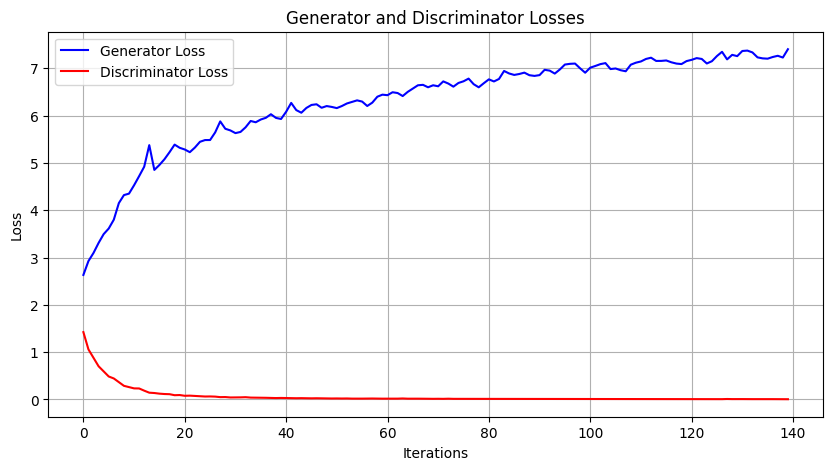

In [47]:
# Train GAN
save_dir = "/content/drive/My Drive/save_dir"
generator, discriminator, gen_losses, disc_losses = train_GAN_(dataloader, generator, discriminator, optimizer_G, optimizer_D, device, num_epochs, latent_dim, save_dir)


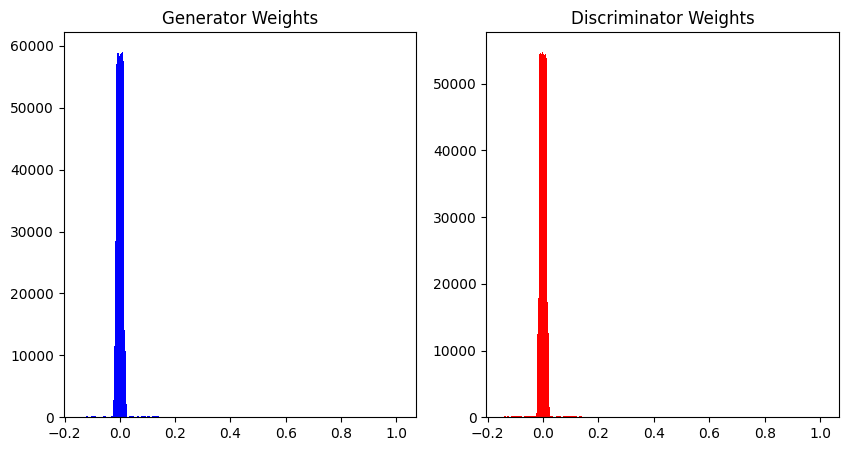

In [62]:
# Plot and save weights of discriminator and generator
plot_weightss(generator, discriminator, save_dir)

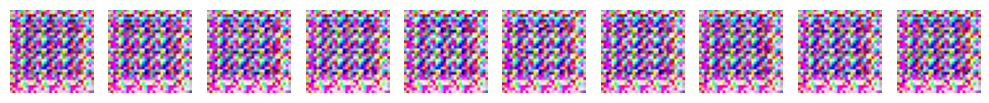

In [52]:
import torch
import matplotlib.pyplot as plt

def test_GAN(generator, latent_dim, num_samples=10, device='cpu'):
    # Generate fake images
    with torch.no_grad():
        noise = torch.randn(num_samples, latent_dim, device=device)
        fake_images = generator(noise).cpu()

    # Plot the generated images
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(fake_images[i].permute(1, 2, 0))
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage:
#generator = YourGeneratorModel()
latent_dim = 100  # Change this to your latent dimension size
test_GAN(generator, latent_dim)
